In [1]:
!pip install yfinance
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime, timedelta
import pandas as pd
from plotly.subplots import make_subplots

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 4.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.3-cp310-cp310-linux_x86_64.whl size=293152 sha256=97fb29d19b165650eac28f0ec67826cd8c60099d3a4ccd1b333b3c649cc3688b
  Stored in directory: /root/.cache/pip/wheels/0d/32/b7/cad9f818b37cf97df4c87a8308da86a433af81651d98f8d8aa
Successfully built peewee


Importing necessary libraries/modules

In [3]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
yf.pdr_override()

****Loading Data for share****

In [6]:
exp = datetime.now()
t0 = exp - timedelta(days=365)
## Loading extra year to be dropped later as 200 moving average will have 200 none values
data = pdr.get_data_yahoo("AAPL", start=t0, end=exp)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-20,166.089996,167.869995,165.559998,166.649994,165.765182,52456400
2023-04-21,165.050003,166.449997,164.490005,165.020004,164.143875,58337300
2023-04-24,165.000000,165.600006,163.889999,165.330002,164.452209,41949600
2023-04-25,165.190002,166.309998,163.729996,163.770004,162.900497,48714100
2023-04-26,163.059998,165.279999,162.800003,163.759995,162.890533,45498800
...,...,...,...,...,...,...
2024-04-15,175.360001,176.630005,172.500000,172.690002,172.690002,73531800
2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200


In [7]:
yf.pdr_override()

In [8]:
stock_symbol = "AAPL"
stock_data = yf.download(stock_symbol, start="2023-04-18", end="2024-04-18")
option_data = yf.Ticker(stock_symbol).options

[*********************100%%**********************]  1 of 1 completed


In [9]:
option_data

('2024-04-19',
 '2024-04-26',
 '2024-05-03',
 '2024-05-10',
 '2024-05-17',
 '2024-05-24',
 '2024-05-31',
 '2024-06-21',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2025-01-17',
 '2025-03-21',
 '2025-06-20',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18')

**Plotting share trend**

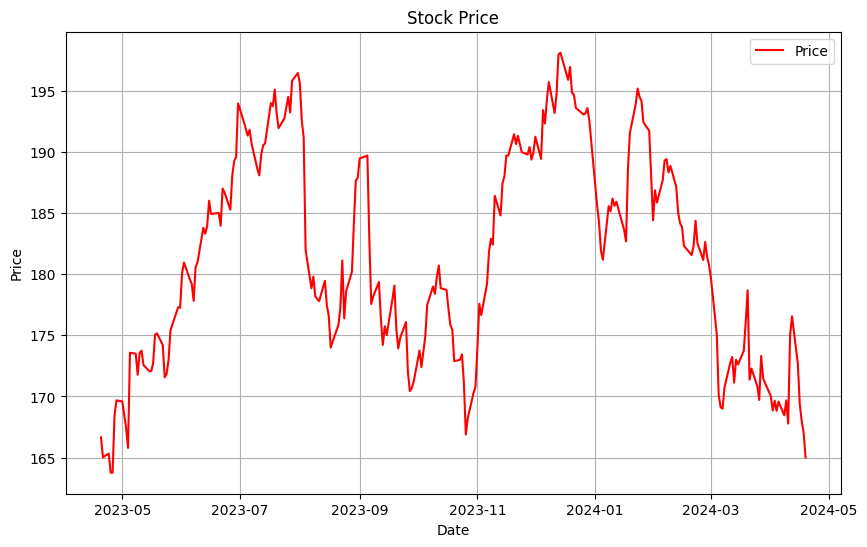

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Price', color='red')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
close = data["Close"].values
close[:5]

array([166.6499939 , 165.02000427, 165.33000183, 163.77000427,
       163.75999451])

**LOG RETURNS**

In [14]:
import numpy as np
returns = []
for i in range(1,len(close)):
    returns.append(close[i]/close[i-1])

log_returns = np.log(np.array(returns))
log_returns[:5]

array([-9.82906356e-03,  1.87678307e-03, -9.48045709e-03, -6.11227409e-05,
        2.79995964e-02])

**Calculating Volatility**

In [15]:
historical_prices = stock_data['Adj Close']
returns = historical_prices.pct_change().dropna()
annual_volatility = np.std(returns) * np.sqrt(252)
print(annual_volatility)

0.19616354793843088


In [16]:
volatility = np.std(log_returns)*np.sqrt(252)
volatility

0.19648117587943503

****Treasury rate (Used 10 years’ US treasury rate as the rate of interest)****

In [9]:
treasury_rate = 0.018

****Fixed different time of maturity to evaluate the call/ put option****

In [17]:
from datetime import datetime, timedelta

exp = ["2024-05-03", "2024-05-30", "2024-06-27"]
exp = [datetime.strptime(date, "%Y-%m-%d") for date in exp]
# Get today's date
current_date = datetime.now()
# Calculate the number of days between each expiry date and today's date
time_until_expiry = [(expiry_date - current_date).days for expiry_date in exp]
time_until_expiry

[13, 40, 68]

**NcR calculation function**

In [18]:
import math

def calculate_combinations(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))



****Function to calculate binnomial series terms****

In [19]:
def bn_terms(n, p, up, down):
    terms = []
    for k in range(n + 1):
        term = ((p ** k) * ((1 - p) ** (n - k)))
        terms.append(term)
    return terms

Function to calculate prices till a given time step n

In [20]:
def calculate_sts(n, up, down, s_initial):
    terms = []
    for k in range(n + 1):
        term = ((up ** k) * (down ** (n - k))) 
        terms.append(term * s_initial)
    return terms


****BInnomial Model****

In [25]:
def option_price(typ, s0, n, k, r, T):
    temp = np.exp(rf*(T/n))
    u = np.exp(volatility*(math.sqrt(T/n)))
    d = np.exp(-1*volatility*(math.sqrt(T/n)))
    # Risk neutral probability
    p = (temp-d)/(u-d)
    
    c = [calculate_combinations(n, k) for k in range(n + 1)]
    bn = bn_terms(n, p, u, d)
    
    
    sts = calculate_sts(n,u,d,s0)

    call = 0
    put = 0

    for i in range(len(sts)):
        if(sts[i]-k > 0):
            call += (sts[i]-k)*c[i]*bn[i]
        elif(sts[i]-k < 0):
            put += (k-sts[i])*c[i]*bn[i]
    
    if(typ == 'call'):
        return call*np.exp(-rf * T)
    elif(typ == 'put'):
        return put*np.exp(-rf * T) 

In [22]:
rf = pdr.get_data_yahoo("^TNX").iloc[-1]['Close']/100
rf = 0.0452

[*********************100%%**********************]  1 of 1 completed


In [23]:
s0 = pdr.get_data_yahoo("AAPL").iloc[-1]['Close']
s0

[*********************100%%**********************]  1 of 1 completed


165.11000061035156

In [26]:
april_calls = []
may_calls = []
june_calls = []

april_puts = []
may_puts = []
june_puts = []

for n in range(5, 100):
    k = 100
    
    april_calls.append(option_price('call', s0, n, k, rf, time_until_expiry[0]))
    may_calls.append(option_price('call', s0, n, k, rf, time_until_expiry[1]))
    june_calls.append(option_price('call', s0, n, k, rf, time_until_expiry[2]))
    
    april_puts.append(option_price('put', s0, n, k, rf, time_until_expiry[0]))
    may_puts.append(option_price('put', s0, n, k, rf, time_until_expiry[1]))
    june_puts.append(option_price('put', s0, n, k, rf, time_until_expiry[2]))

****BLACK SCHOLES MODEL****

In [28]:
from math import log, sqrt, exp, erf

calls = []
puts = []
for T in time_until_expiry:
    # Calculate d1 and d2
    d1 = (log(s0 / k) + (rf + (volatility ** 2) / 2) * T) / (volatility * sqrt(T))
    d2 = d1 - volatility * sqrt(T)
    def N(x):
        return (1 + erf(x / sqrt(2))) / 2

    # Calculate N_d1 and N_d2
    N_d1 = N(d1)
    N_d2 = N(d2)
    call = s0 * N_d1 - k * exp(-rf * T) * N_d2
    N_d1 = N(-d1)
    N_d2 = N(-d2)
    put = k * exp(-rf * T) * N_d2 - s0 * N_d1
    calls.append(call)
    puts.append(put)

In [29]:
print(calls, puts)

[111.28826014111667, 149.39786661817016, 160.64958559274586] [1.7441863266037556, 0.6860432681083533, 0.1650188972324861]


****PLOTS showing that increasing the number of steps in Binomial model the price of options converges to that calculated using Black scholes model****

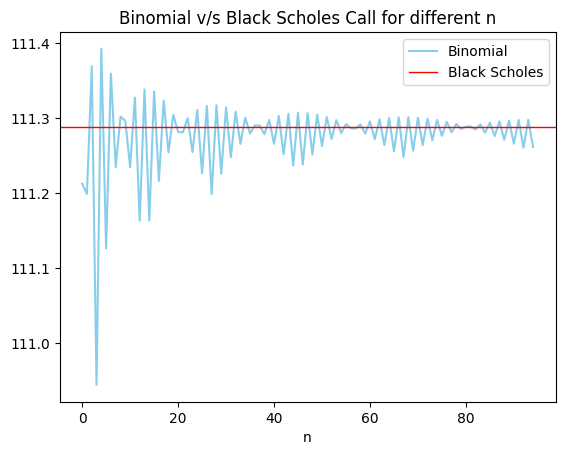

In [30]:
plt.plot(april_calls, label='Binomial', color='skyblue')
plt.axhline(calls[0], color='red', label='Black Scholes', linewidth=1)
plt.xlabel('n')

plt.title('Binomial v/s Black Scholes Call for different n')
plt.legend()
plt.show()

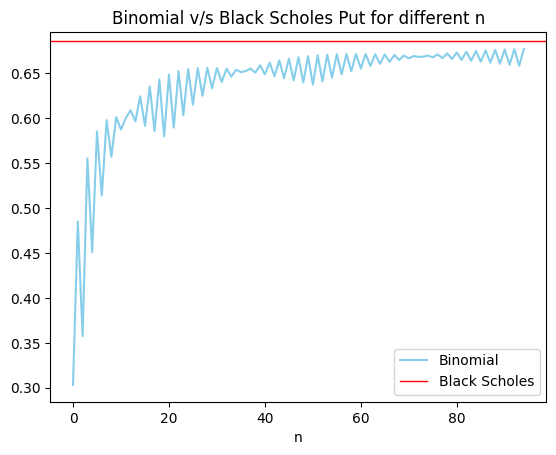

In [31]:
plt.plot(may_puts, label='Binomial', color='skyblue')
plt.axhline(puts[1], color='red', label='Black Scholes', linewidth=1)
plt.xlabel('n')

plt.title('Binomial v/s Black Scholes Put for different n')
plt.legend()
plt.show()

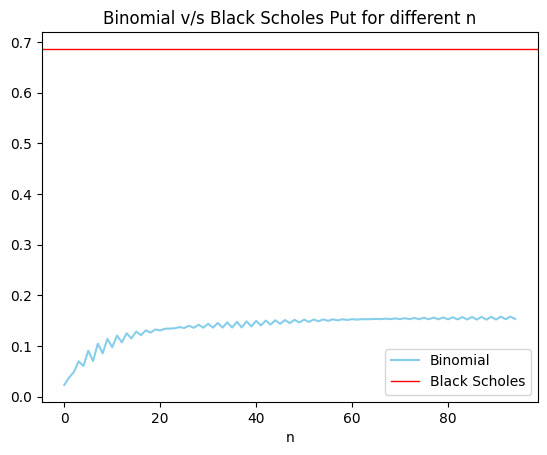

In [33]:
plt.plot(june_puts, label='Binomial', color='skyblue')
plt.axhline(puts[1], color='red', label='Black Scholes', linewidth=1)
plt.xlabel('n')

plt.title('Binomial v/s Black Scholes Put for different n')
plt.legend()
plt.show()

Comaprision to actual market

In [35]:
ticker_symbol = "AAPL"
options_data = yf.Ticker(ticker_symbol).options
# options_data
expiry_date = options_data[0]
options_chain = yf.Ticker(ticker_symbol).option_chain(expiry_date)

calls = pd.DataFrame(options_chain.calls)
puts = pd.DataFrame(options_chain.puts)

In [36]:
calls = calls[['strike','lastPrice']]
puts = puts[['strike','lastPrice']]

In [37]:
calls.head()

,strike,lastPrice
0,5.0,164.30
1,10.0,157.15
2,15.0,155.95
3,30.0,142.65
4,35.0,142.43


In [38]:
puts.head()

,strike,lastPrice
0,5.0,0.01
1,10.0,0.01
2,20.0,0.01
3,60.0,0.01
4,65.0,0.01


**Calculating delta and implied volatility**

In [42]:
from scipy.stats import norm
def black_scholes_option_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return option_price

In [43]:
black_scholes_price = black_scholes_option_price(historical_prices.iloc[-1], 150, 1, 0.018, volatility, 'call')

In [44]:
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

def delta_neutral_portfolio(S, K, T, r, sigma):
    option_delta = delta_call(S, K, T, r, sigma)
    stock_delta = 1.0  # Delta of the underlying stock is 1
    ratio = -option_delta / stock_delta
    return ratio

def black_scholes_option_price_with_sigma(S, K, T, r, sigma, option_price, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        calculated_option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        calculated_option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    return option_price - calculated_option_price

def implied_volatility(S, K, T, r, option_price, option_type='call'):
    implied_volatility = newton(
        black_scholes_option_price_with_sigma, 
        x0=annual_volatility, 
        args=(S, K, T, r, option_price, option_type)
    )
    return implied_volatility

In [47]:
from scipy.optimize import newton
S = historical_prices.iloc[-1]
K = 150
T = 1
r = 0.018
option_price = black_scholes_price  

ratio = delta_neutral_portfolio(S, K, T, r, volatility)
implied_vol = implied_volatility(S, K, T, r, option_price)

print("Delta-neutral portfolio ratio:", ratio)
print("Implied Volatility:", implied_vol)

Delta-neutral portfolio ratio: -0.7783533917171043
Implied Volatility: 25.321061848289602
